In [ ]:
# Import to libraries that manipulate datasets and numbers: numpy, pandas, graphing libraries, data visualization: seaborn, matplotlib.
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
data=pd.read_csv('D:/diabetes_data.csv')
data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

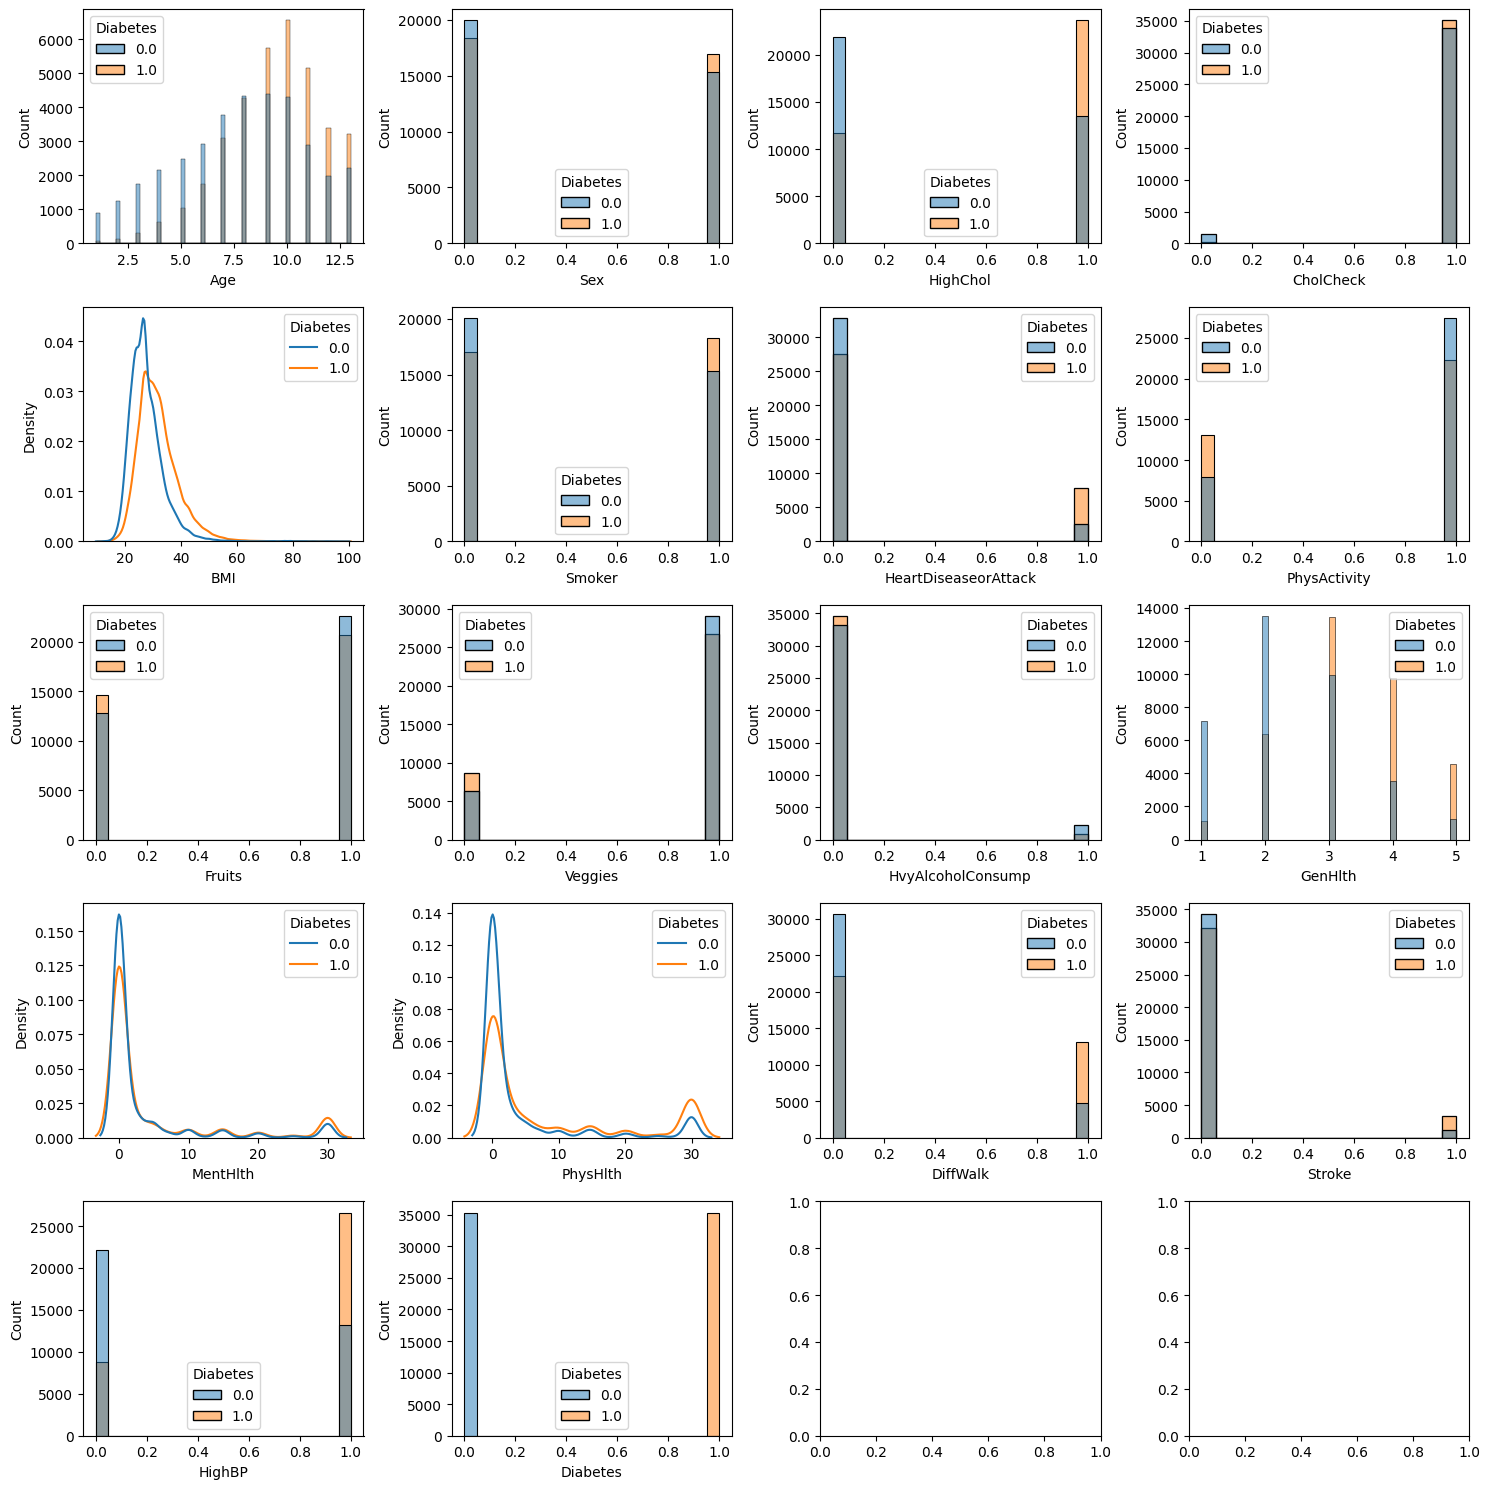

In [ ]:
fig, ax = plt.subplots(5, 4, figsize=(15,15))
k = 0
for i in range(5):
    for j in range(4):
        if k >= len(data.keys()):
            continue
        col = data.keys()[k]
        if col=='BMI' or col=='MentHlth' or col=='PhysHlth':
            sns.kdeplot(data=data, x=col, hue='Diabetes', ax=ax[i,j])
        else:
            sns.histplot(data=data, x=col, hue='Diabetes', ax=ax[i,j])
        k += 1
plt.tight_layout()
plt.show()

<Axes: >

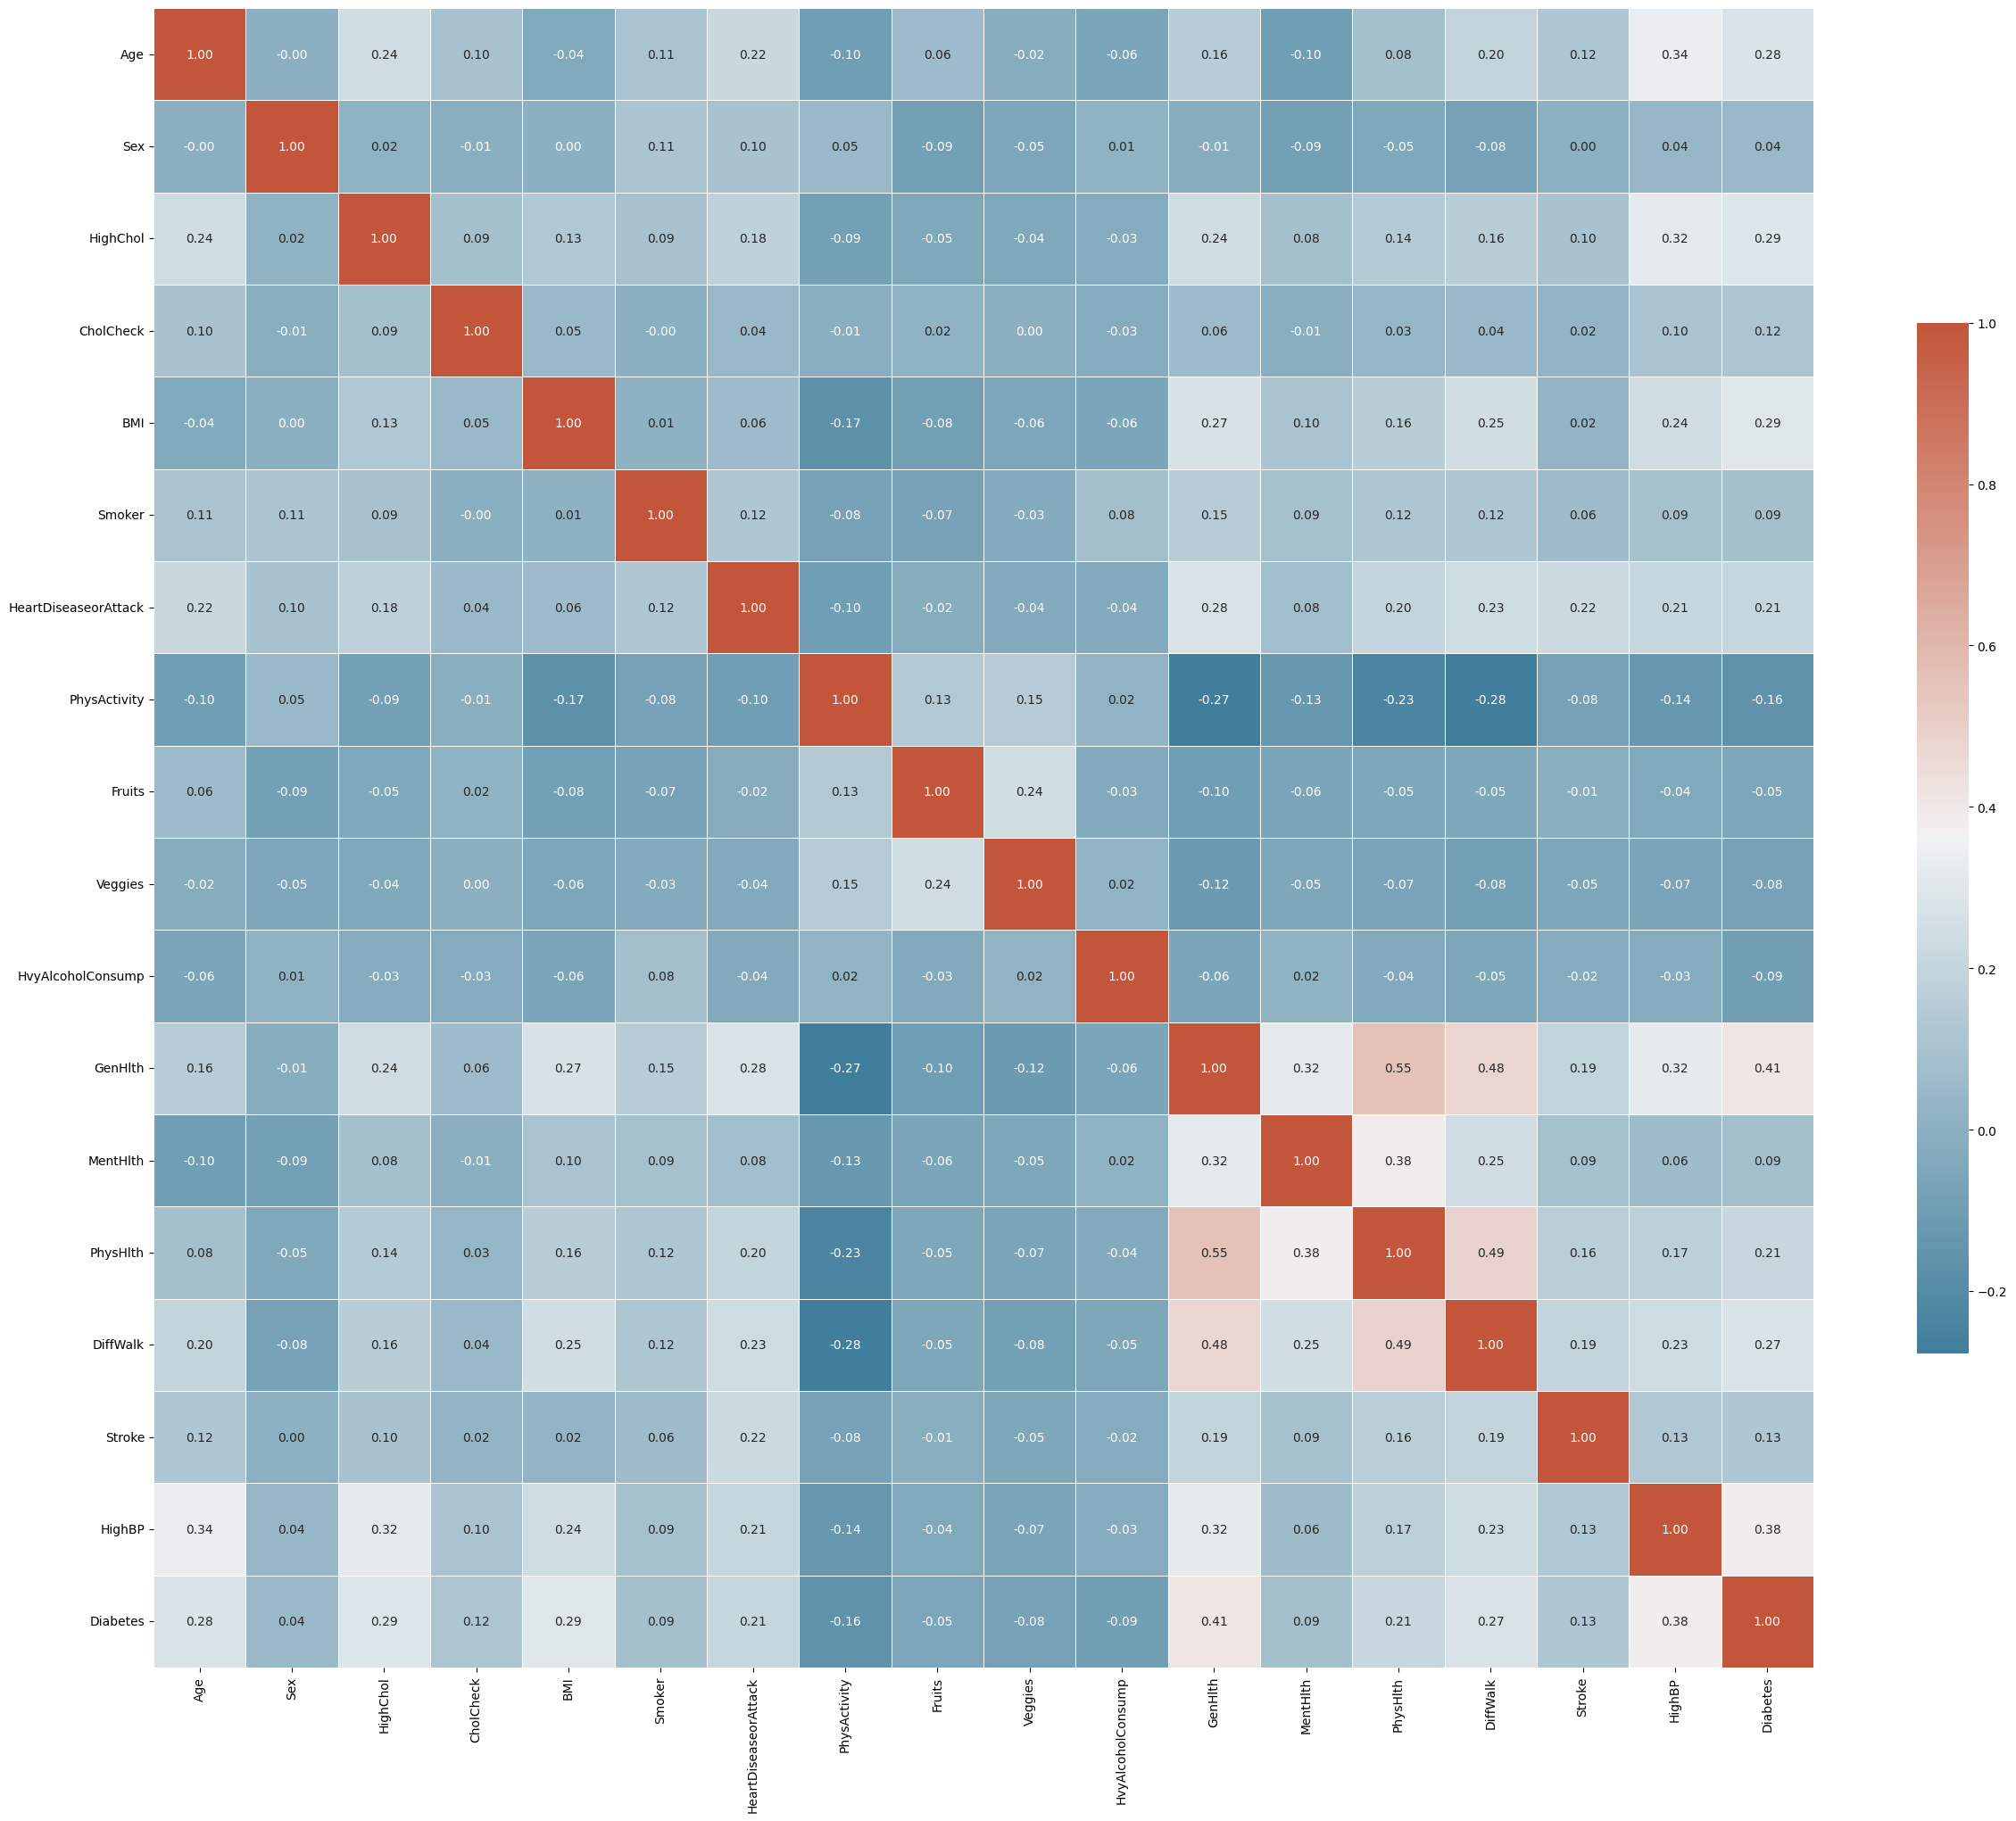

In [ ]:
corr = data.corr()
fig, ax = plt.subplots(figsize= (30,30))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(230, 20, as_cmap=True),
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

In [ ]:
# Correlation between target with other features
corr = data.corr()
corr['Diabetes']

Age                     0.278738
Sex                     0.044413
HighChol                0.289213
CholCheck               0.115382
BMI                     0.293373
Smoker                  0.085999
HeartDiseaseorAttack    0.211523
PhysActivity           -0.158666
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
GenHlth                 0.407612
MentHlth                0.087029
PhysHlth                0.213081
DiffWalk                0.272646
Stroke                  0.125427
HighBP                  0.381516
Diabetes                1.000000
Name: Diabetes, dtype: float64

In [ ]:
# We try to find the features that have high correlation with any each other (no include target variable)
cols = data.drop(labels='Diabetes', axis=1).columns.tolist()
cols_fn = cols.copy()
for i in range(len(cols)-1):
  for j in range(i+1,len(cols),1):
    score = data[cols[i]].corr(data[cols[j]])
    if abs(score) >= 0.8:
      try:
        cols_fn.remove(cols[i])
      except:
        pass

print(len(cols_fn))
print(cols_fn)
cols_fn.append('Diabetes')

17
['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP']


In [ ]:
# Correlation between target with other features
corr = data[cols_fn].corr()
corr['Diabetes']

Age                     0.278738
Sex                     0.044413
HighChol                0.289213
CholCheck               0.115382
BMI                     0.293373
Smoker                  0.085999
HeartDiseaseorAttack    0.211523
PhysActivity           -0.158666
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
GenHlth                 0.407612
MentHlth                0.087029
PhysHlth                0.213081
DiffWalk                0.272646
Stroke                  0.125427
HighBP                  0.381516
Diabetes                1.000000
Name: Diabetes, dtype: float64

<Axes: >

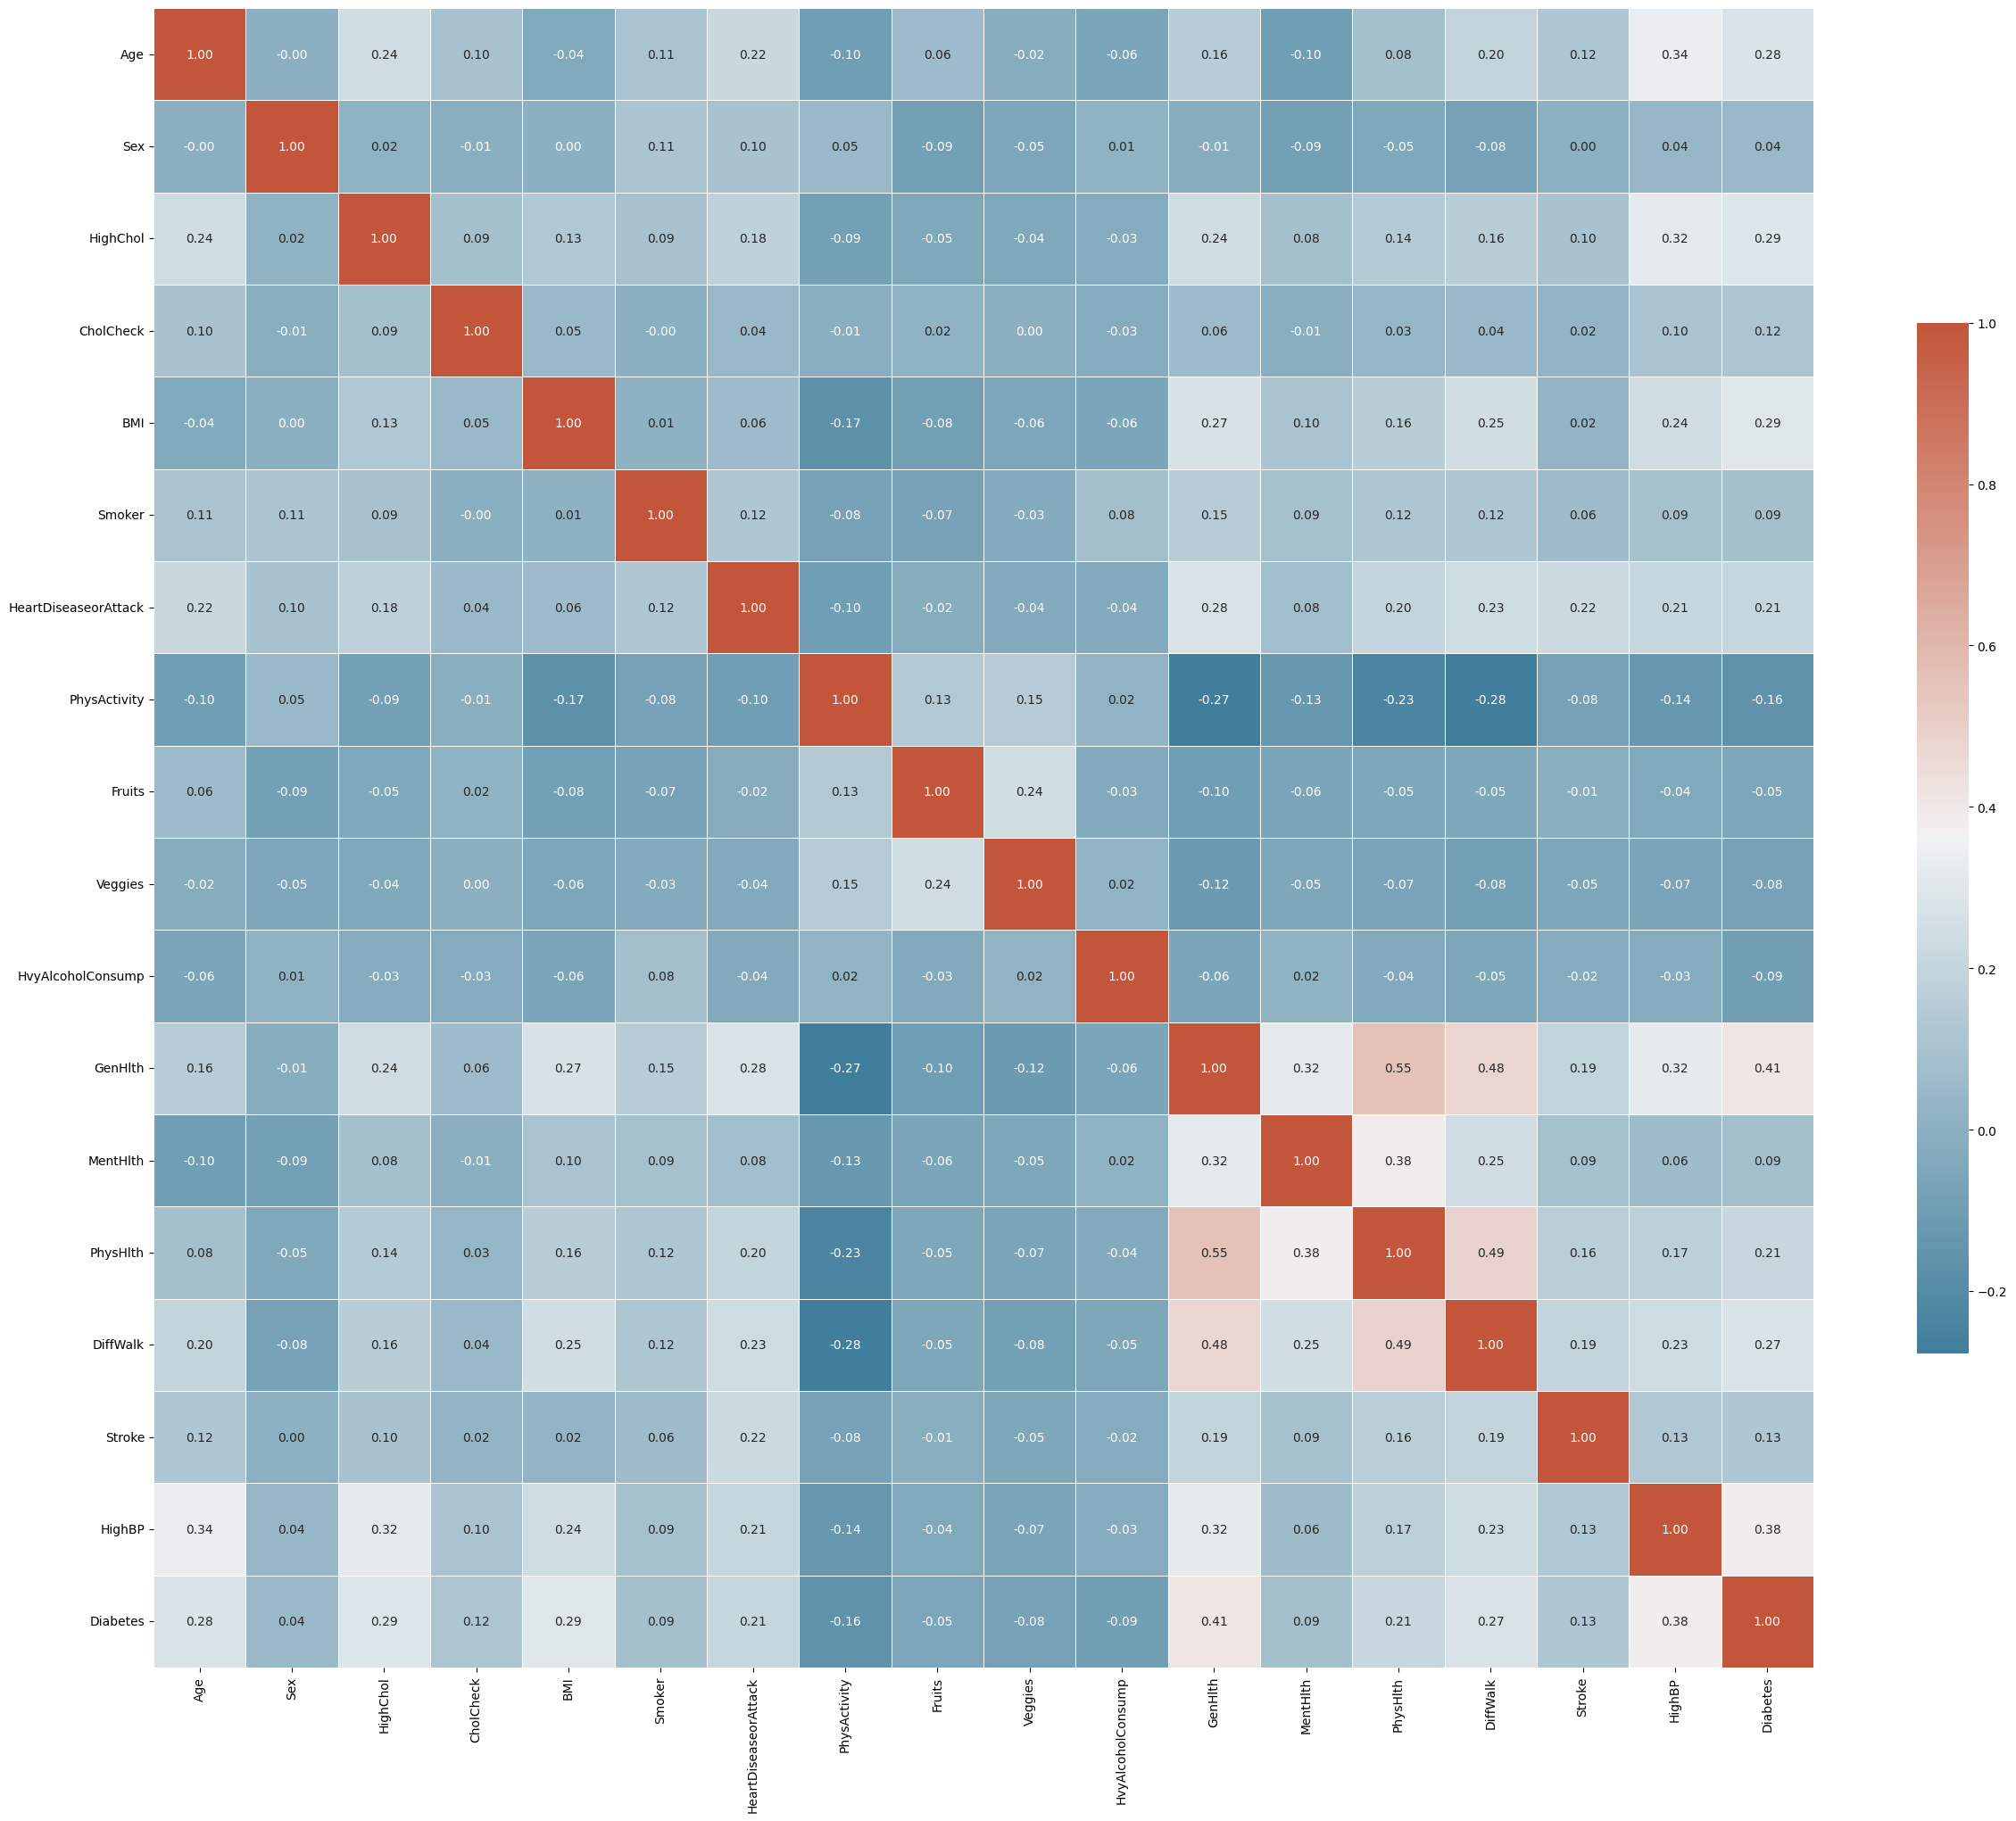

In [ ]:
fig, ax = plt.subplots(figsize= (30,30))
sns.heatmap(corr, mask=np.zeros_like(abs(corr), dtype=bool), cmap=sns.diverging_palette(230, 20, as_cmap=True),
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

In [ ]:
# Find out features have correlation with target variable
# Choose threshold = 0.2 that mean choose correlation features with
df_ = pd.DataFrame(corr.round(2).loc['Diabetes'])
pos_corr = df_.loc[df_.Diabetes >= 0.2] # Positive correlation
neg_corr = df_.loc[df_.Diabetes <= -0.2] # Negative correlation
result = pd.concat([pos_corr, neg_corr])
print(result)
corr_features = result.index.to_list()
print('Features have correlation with Diabetes:\n', corr_features)
print(len(corr_features))

                      Diabetes
Age                       0.28
HighChol                  0.29
BMI                       0.29
HeartDiseaseorAttack      0.21
GenHlth                   0.41
PhysHlth                  0.21
DiffWalk                  0.27
HighBP                    0.38
Diabetes                  1.00
Features have correlation with Diabetes:
 ['Age', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'PhysHlth', 'DiffWalk', 'HighBP', 'Diabetes']
9


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(labels='Diabetes', axis=1), data['Diabetes'])

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
feature_importances = gb_model.feature_importances_

GrB_features = []
#Print important score of each feature
for feature, importance in enumerate(feature_importances):
  if importance >= 0.02:
    GrB_features.append(data.columns[feature])
    print(f"Feature: {data.columns[feature]}: {importance}")

Feature: Age: 0.10151954135618312
Feature: HighChol: 0.06549415566176195
Feature: BMI: 0.12056394953922259
Feature: GenHlth: 0.2908246938987075
Feature: HighBP: 0.35439698674602993


In [ ]:
data_FE_important = data[corr_features]
# data_FE_important = data_FE[GrB_features]
data_FE_important

,Age,HighChol,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,HighBP,Diabetes
0,4.0,0.0,26.0,0.0,3.0,30.0,0.0,1.0,0.0
1,12.0,1.0,26.0,0.0,3.0,0.0,0.0,1.0,0.0
2,13.0,0.0,26.0,0.0,1.0,10.0,0.0,0.0,0.0
3,11.0,1.0,28.0,0.0,3.0,3.0,0.0,1.0,0.0
4,8.0,0.0,29.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
70687,6.0,1.0,37.0,0.0,4.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,29.0,1.0,2.0,0.0,1.0,0.0,1.0
70689,13.0,1.0,25.0,1.0,5.0,0.0,1.0,1.0,1.0
70690,11.0,1.0,18.0,0.0,4.0,0.0,1.0,1.0,1.0


In [ ]:
# Function to create histogram, Q-Q plot and boxplot
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_2432\3932088561.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


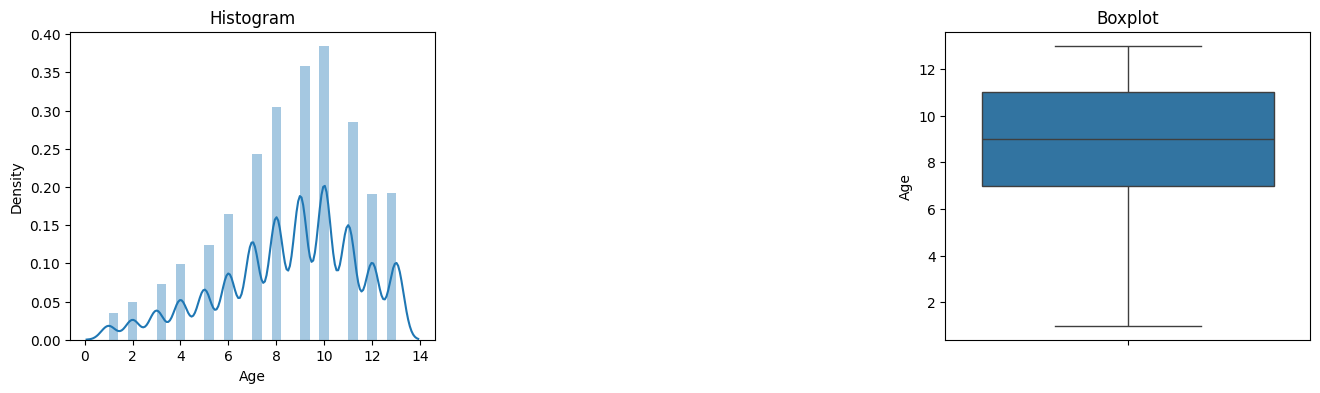

C:\Users\PC\AppData\Local\Temp\ipykernel_2432\3932088561.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


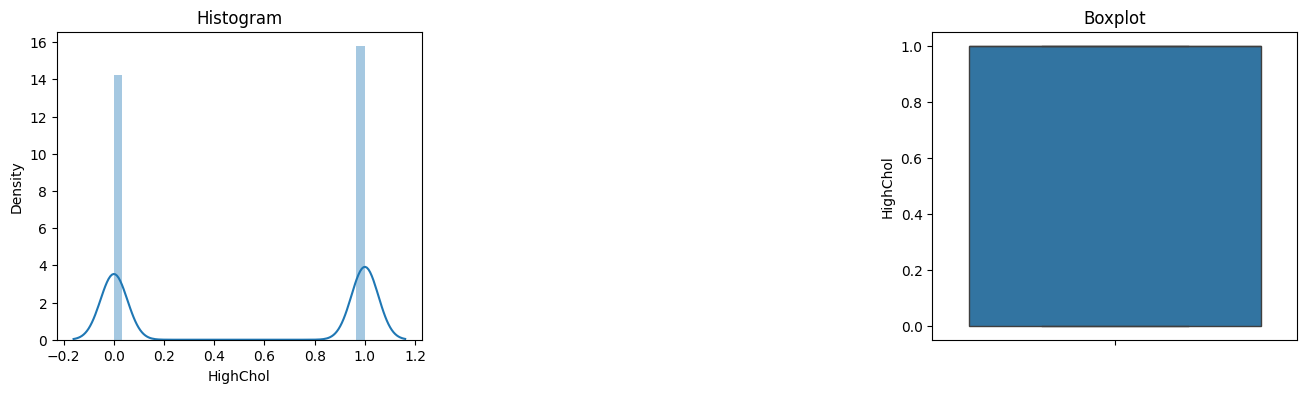

C:\Users\PC\AppData\Local\Temp\ipykernel_2432\3932088561.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


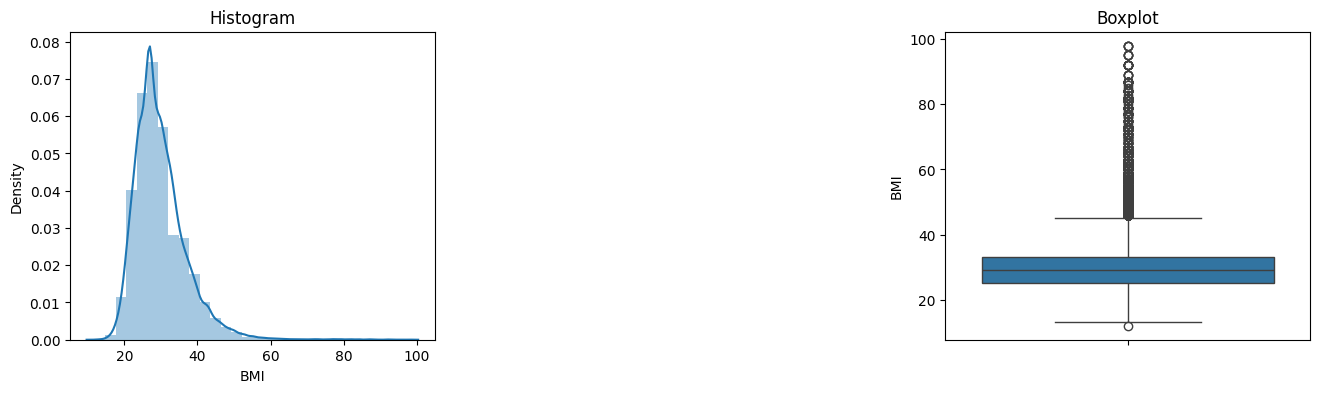

C:\Users\PC\AppData\Local\Temp\ipykernel_2432\3932088561.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


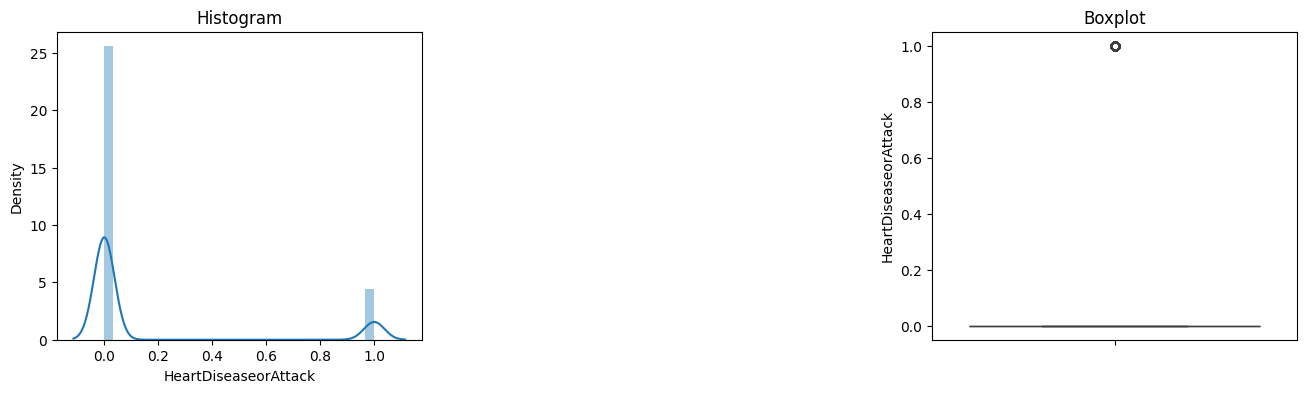

C:\Users\PC\AppData\Local\Temp\ipykernel_2432\3932088561.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


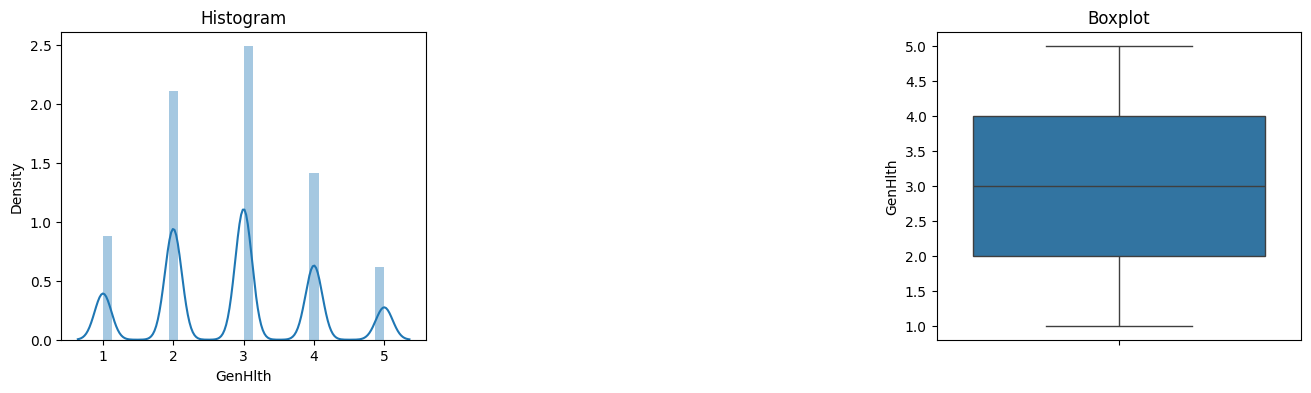

C:\Users\PC\AppData\Local\Temp\ipykernel_2432\3932088561.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


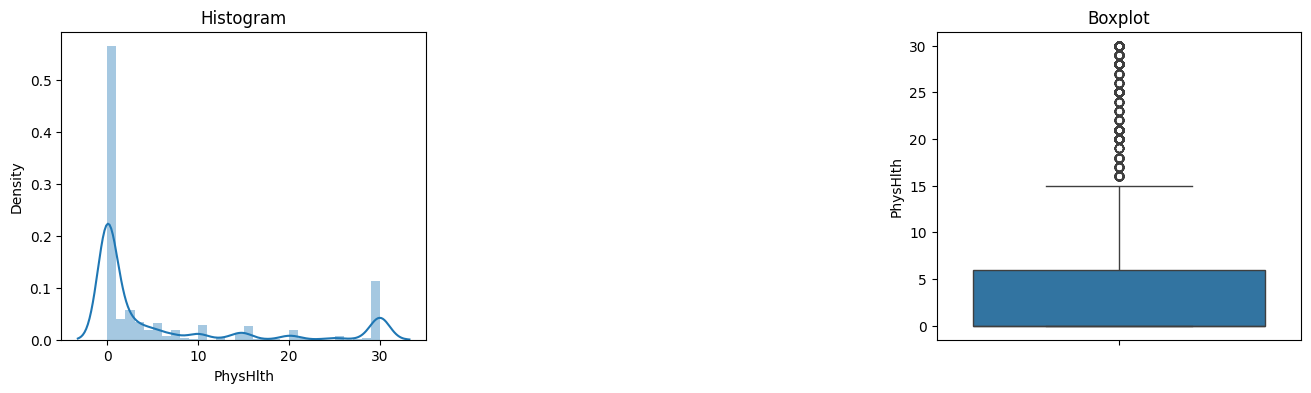

C:\Users\PC\AppData\Local\Temp\ipykernel_2432\3932088561.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


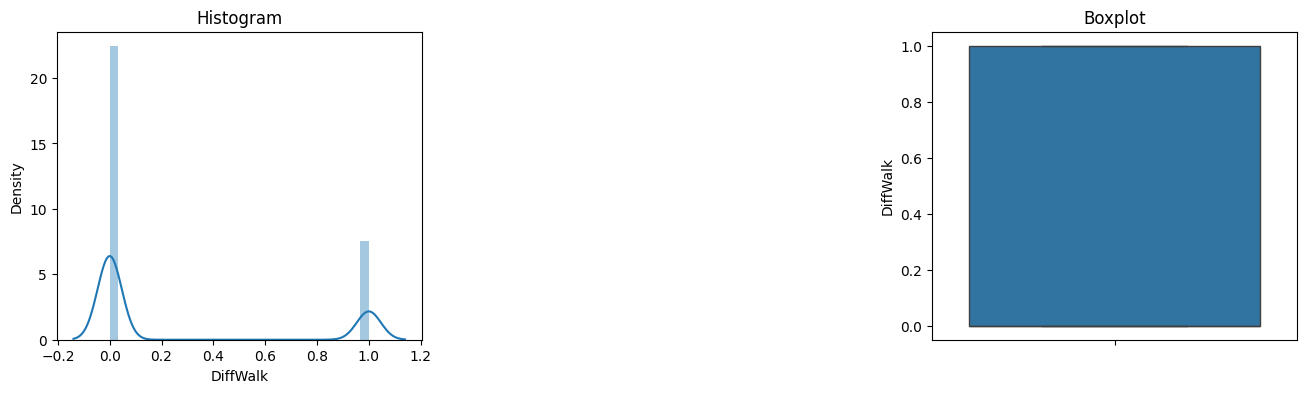

C:\Users\PC\AppData\Local\Temp\ipykernel_2432\3932088561.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


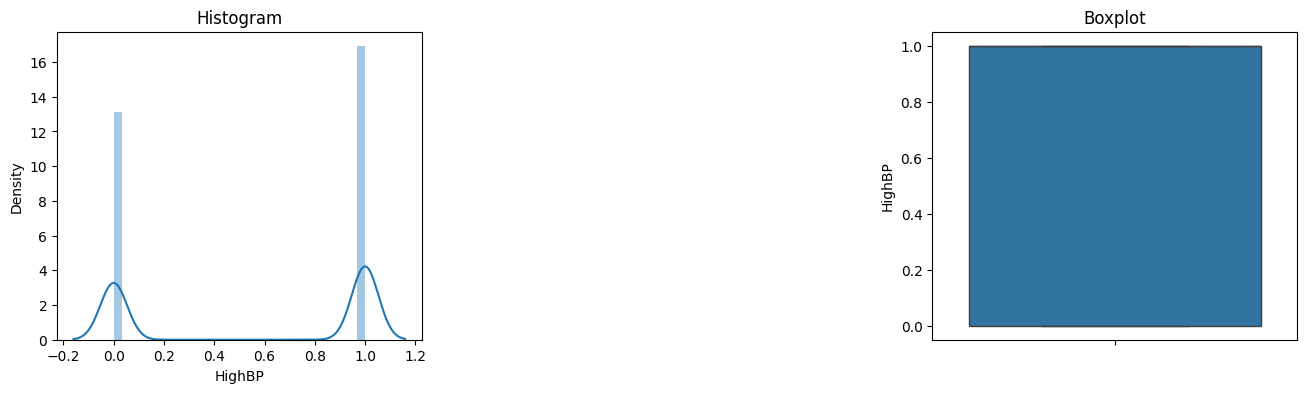

C:\Users\PC\AppData\Local\Temp\ipykernel_2432\3932088561.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


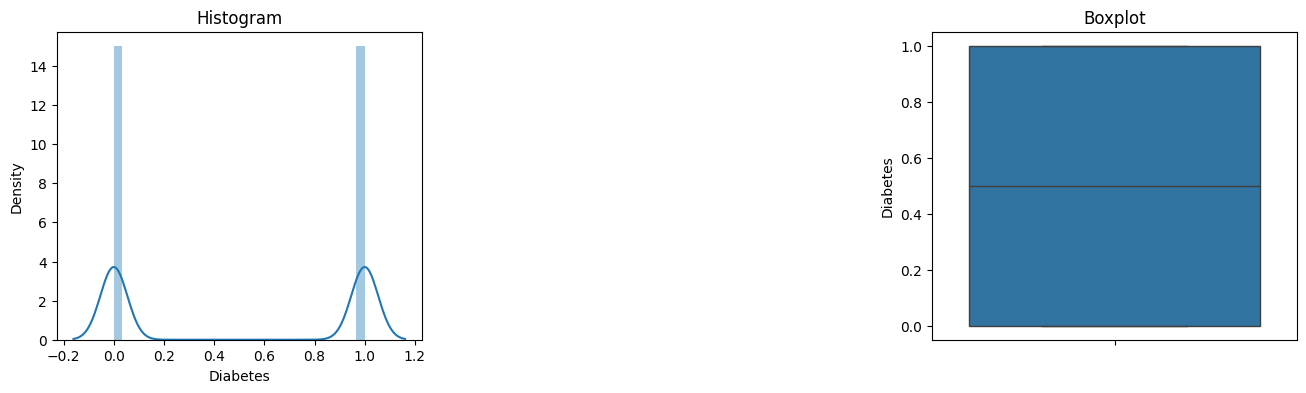

In [ ]:
#Visualize distribution of each column and find outliers
for col in data_FE_important.columns:
  diagnostic_plots(data_FE_important, col)

In [ ]:
from sklearn.linear_model import LinearRegression
# Include outlier with LinearRegression
train, test = train_test_split(data_FE_important, train_size= 0.8)
X_train, y_train = train.drop(labels='Diabetes', axis=1), train['Diabetes']
X_test, y_test = test.drop(labels='Diabetes', axis=1), test['Diabetes']

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 0.17521071047635098
Score: 0.299134155991566


In [ ]:
# Ignore outlier
train_noOutlier = 0
test_noOutlier = 0
data_nonOutlier=pd.DataFrame()
for col in data_FE_important.columns:
  lower_bound = data_FE_important[col].quantile(0)
  upper_bound = data_FE_important[col].quantile(1)
  train_noOutlier = train[(train[col] >= lower_bound) & (train[col] <= upper_bound)]
  test_noOutlier = test[(test[col] >= lower_bound) & (test[col] <= upper_bound)]

len(train_noOutlier) + len(test_noOutlier)

70692

In [ ]:
data_FE_nonOutlier = pd.concat([train_noOutlier, test_noOutlier], ignore_index=True)
data_FE_nonOutlier.to_csv('data_FE_nonOutlier.csv', index=False)
train_noOutlier.to_csv('train.csv', index=False)
test_noOutlier.to_csv('test.csv', index=False)

In [ ]:
# Ignore outlier with LinearRegression
X_train, y_train = train_noOutlier.drop(labels='Diabetes', axis=1), train_noOutlier['Diabetes']
X_test, y_test = test_noOutlier.drop(labels='Diabetes', axis=1), test_noOutlier['Diabetes']

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 0.17521071047635098
Score: 0.299134155991566


In [ ]:
final_train = pd.read_csv('train.csv')
final_test = pd.read_csv('test.csv')

len(final_train) + len(final_test)

70692

In [ ]:
from joblib import dump

sd_scale_train = final_train.drop(labels=['Diabetes'], axis=1)
sd_scale_test = final_test.drop(labels=['Diabetes'], axis=1)

SS = StandardScaler()
SS.fit(sd_scale_train)
cols = sd_scale_train.columns
sd_scale_train = pd.DataFrame(SS.transform(sd_scale_train), columns=cols)
sd_scale_test = pd.DataFrame(SS.transform(sd_scale_test), columns=cols)

dump(SS, 'std_scaler.bin', compress=True)

sd_scale_train.head(5)

,Age,HighChol,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,HighBP
0,-1.260792,0.951268,1.421384,-0.415531,1.043125,2.391941,-0.582870,-1.137115
1,-0.207069,0.951268,-0.823680,2.406558,1.941213,1.896750,1.715648,0.879419
2,-0.207069,-1.051228,0.298852,-0.415531,0.145036,2.391941,-0.582870,0.879419
3,-2.314514,-1.051228,2.403599,-0.415531,0.145036,-0.579205,-0.582870,0.879419
4,-1.260792,-1.051228,1.281067,2.406558,0.145036,-0.381129,1.715648,-1.137115


In [ ]:
sd_scale_test.head(5)

,Age,HighChol,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,HighBP
0,0.144172,0.951268,0.298852,-0.415531,-0.753052,-0.579205,-0.582870,0.879419
1,0.846654,0.951268,0.439168,-0.415531,1.941213,2.391941,1.715648,0.879419
2,0.495413,0.951268,0.158536,-0.415531,0.145036,-0.579205,-0.582870,0.879419
3,0.144172,0.951268,-0.823680,-0.415531,-0.753052,-0.381129,-0.582870,-1.137115
4,-0.207069,-1.051228,1.140751,-0.415531,0.145036,-0.579205,-0.582870,0.879419


In [ ]:
# Try again with LinearRegression
X_train, y_train = sd_scale_train, final_train['Diabetes']
X_test, y_test = sd_scale_test, final_test['Diabetes']

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 0.17521071047635087
Score: 0.29913415599156645


In [ ]:
# Predict the target variable for the entire dataset
predictions = model.predict(features)

# Create a DataFrame to display the actual and predicted values
results = pd.DataFrame({
    'Actual': target,
    'Predicted': predictions
})

# Display the first few rows of the results
results

,Actual,Predicted
0,0.0,0.335117
1,0.0,0.750500
2,0.0,0.211277
3,0.0,0.685364
4,0.0,0.212586
...,...,...
70687,1.0,0.602256
70688,1.0,0.508151
70689,1.0,0.996785
70690,1.0,0.720430


In [ ]:
def my_pipeline(model, x):
    scaler = preprocessing.MinMaxScaler()
    preprocessor = ColumnTransformer(transformers=[('norm', scaler, x.columns)])

    return Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

In [ ]:
model_DT = DecisionTreeClassifier(class_weight='balanced')

pipeline_DT = my_pipeline(model_DT, X_train)
pipeline_DT.fit(X_train, y_train)

y_pred_DT = pipeline_DT.predict(X_test)

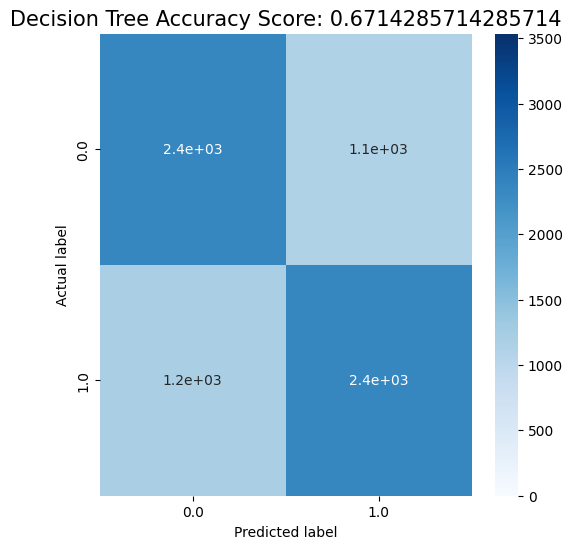

Decision Tree classification report:
               precision    recall  f1-score   support

         0.0       0.67      0.68      0.67      3504
         1.0       0.68      0.67      0.67      3566

    accuracy                           0.67      7070
   macro avg       0.67      0.67      0.67      7070
weighted avg       0.67      0.67      0.67      7070



In [ ]:
from sklearn import metrics
confussion_matrix = pd.crosstab(y_test, y_pred_DT, rownames=['Actual'], colnames=['Prediction'])
plt.figure(figsize=(6,6))
sns.heatmap(confussion_matrix, annot=True, vmin=0, vmax=int(len(y_test)/2), cmap='Blues')
tree_score = metrics.accuracy_score(y_test, y_pred_DT)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Decision Tree Accuracy Score: {0}'.format(tree_score), size=15)
plt.show()

report = classification_report(y_test, y_pred_DT)
print('Decision Tree classification report:\n', report)

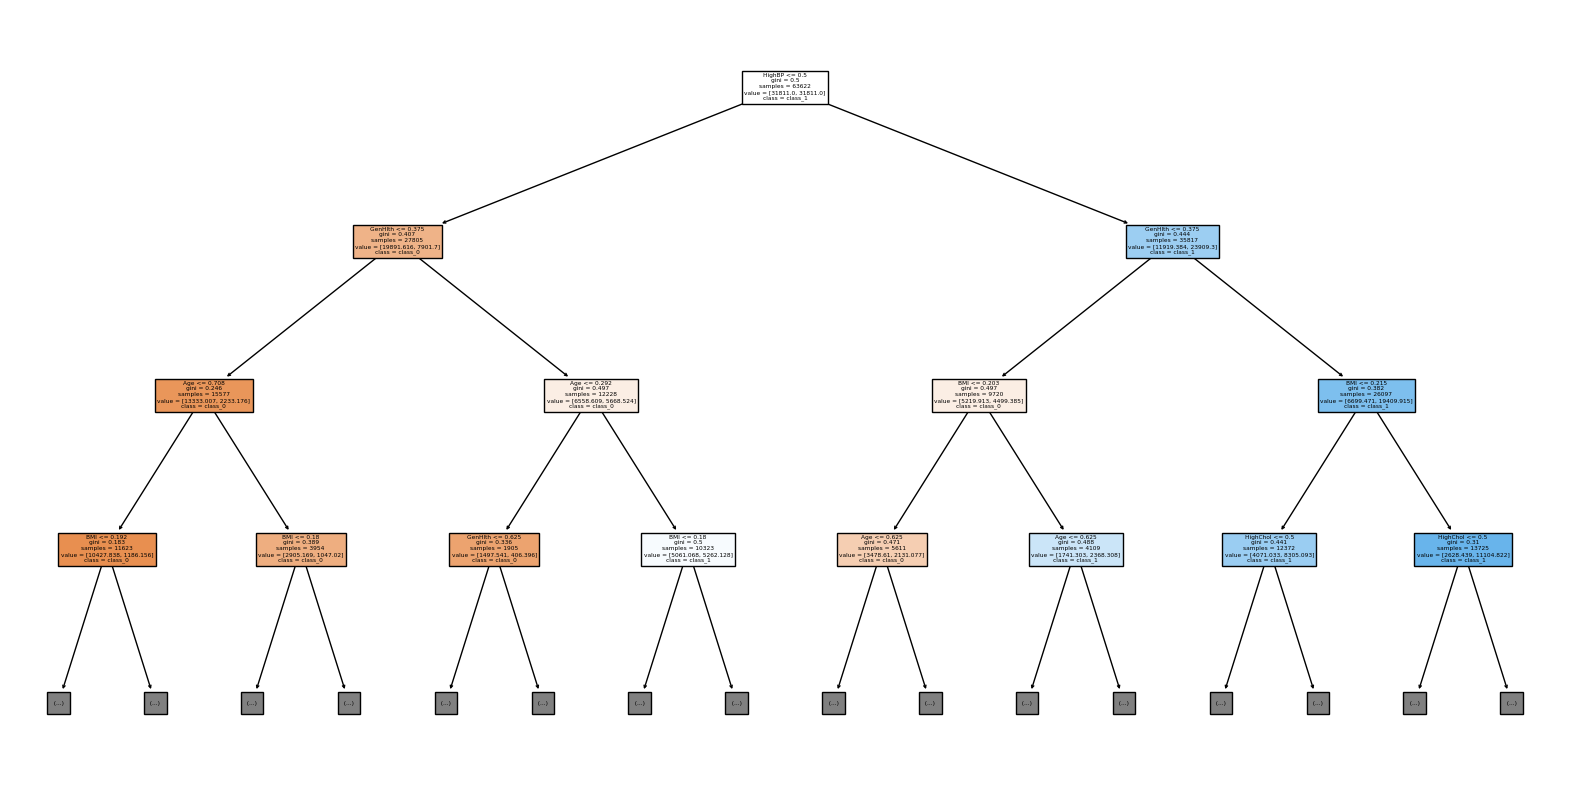

In [ ]:
from sklearn.tree import plot_tree

# Draw Decision Tree
plt.figure(figsize=(20,10))
plot_tree(pipeline_DT.named_steps['model'], feature_names=X_train.columns, class_names=['class_0', 'class_1'], filled=True, max_depth=3)  # Adjust max_depth as needed
plt.show()

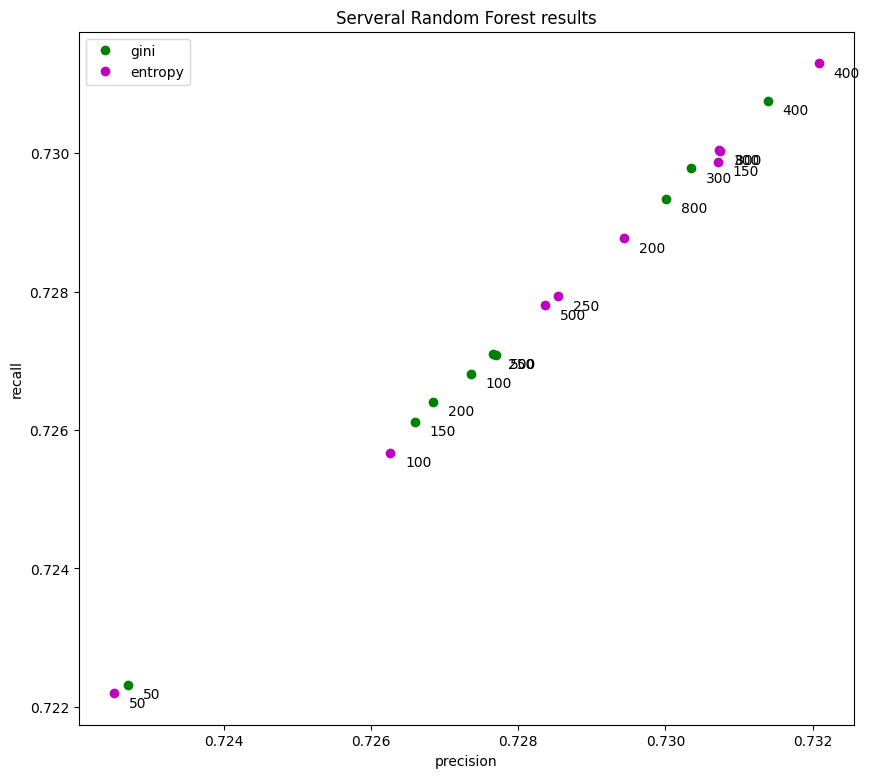

In [ ]:
trees = [50, 100, 150, 200, 250, 300, 400, 500, 800]
results = {'gini': {'precision':[], 'recall':[]},
           'entropy': {'precision':[], 'recall':[]}}
for crit in ['gini', 'entropy']:
    for n in trees:
        model = RandomForestClassifier(n_estimators=n,
                                          criterion=crit,
                                          class_weight='balanced',
                                          bootstrap=True,
                                          n_jobs=-1)
        pipeline = my_pipeline(model, X_train)
        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)

        report = classification_report(y_test, y_pred, output_dict=True)

        results[crit]['precision'].append(report['macro avg']['precision'])
        results[crit]['recall'].append(report['macro avg']['recall'])
fig = plt.figure(figsize=(10,9))
plt.plot(np.array(results['gini']['precision']), np.array(results['gini']['recall']), 'go', label='gini')
plt.plot(np.array(results['entropy']['precision']), np.array(results['entropy']['recall']), 'mo', label='entropy')
for i in range(len(trees)):
    plt.annotate(str(trees[i]), xy=(results['gini']['precision'][i]+2e-4,results['gini']['recall'][i]-2e-4))
    plt.annotate(str(trees[i]), xy=(results['entropy']['precision'][i]+2e-4,results['entropy']['recall'][i]-2e-4))
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Serveral Random Forest results')
plt.legend()
plt.show()

In [ ]:
model_RF = RandomForestClassifier(n_estimators=400,
                                  class_weight='balanced',
                                  bootstrap=True,
                                  n_jobs=-1)
pipeline_RF = my_pipeline(model_RF, X_train)
pipeline_RF.fit(X_train, y_train)

y_pred_RF = pipeline_RF.predict(X_test)

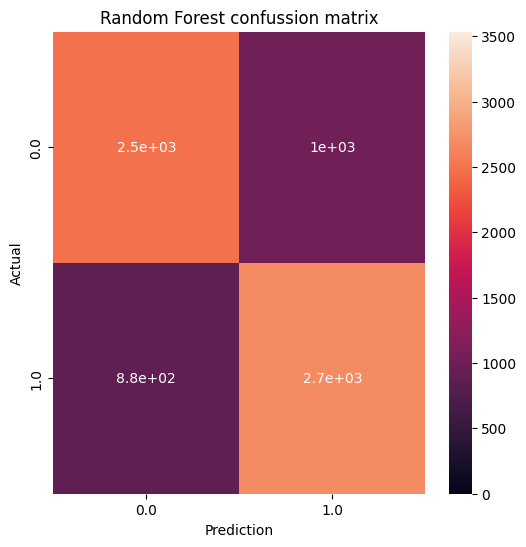

Random Forest classification report:
               precision    recall  f1-score   support

         0.0       0.74      0.71      0.72      3504
         1.0       0.72      0.75      0.74      3566

    accuracy                           0.73      7070
   macro avg       0.73      0.73      0.73      7070
weighted avg       0.73      0.73      0.73      7070



In [ ]:
confussion_matrix = pd.crosstab(y_test, y_pred_RF, rownames=['Actual'], colnames=['Prediction'])
plt.figure(figsize=(6,6))
sns.heatmap(confussion_matrix, annot=True, vmin=0, vmax=int(len(y_test)/2))
plt.title('Random Forest confussion matrix')
plt.show()

report = classification_report(y_test, y_pred_RF)
print('Random Forest classification report:\n', report)


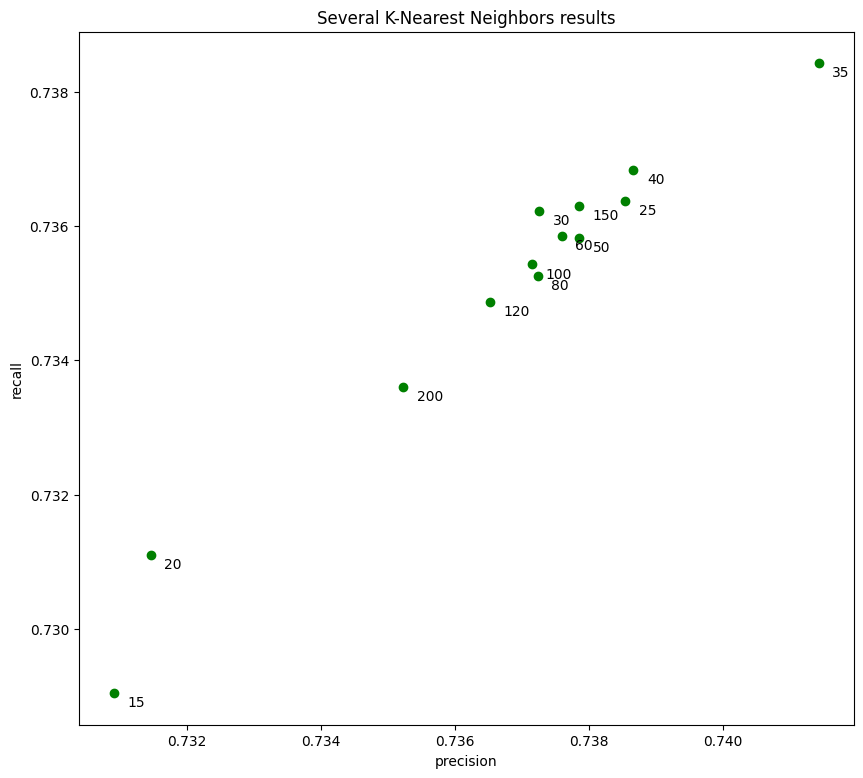

In [ ]:
neighbors = [15, 20, 25, 30, 35, 40, 50, 60, 80, 100, 120, 150, 200]
results = {'precision':[], 'recall':[]}
for n in neighbors:
    model = KNeighborsClassifier(n_neighbors=n, algorithm='auto', n_jobs=-1)

    pipeline = my_pipeline(model, X_train)
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)

    results['precision'].append(report['macro avg']['precision'])
    results['recall'].append(report['macro avg']['recall'])

fig = plt.figure(figsize=(10,9))
plt.plot(np.array(results['precision']), np.array(results['recall']), 'go')
for i in range(len(neighbors)):
    plt.annotate(str(neighbors[i]), xy=(results['precision'][i]+2e-4,results['recall'][i]-2e-4))
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Several K-Nearest Neighbors results')
plt.show()


In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=35, algorithm='auto', n_jobs=-1)

pipeline_KNN = my_pipeline(model_KNN, X_train)
pipeline_KNN.fit(X_train, y_train)

y_pred_KNN = pipeline_KNN.predict(X_test)

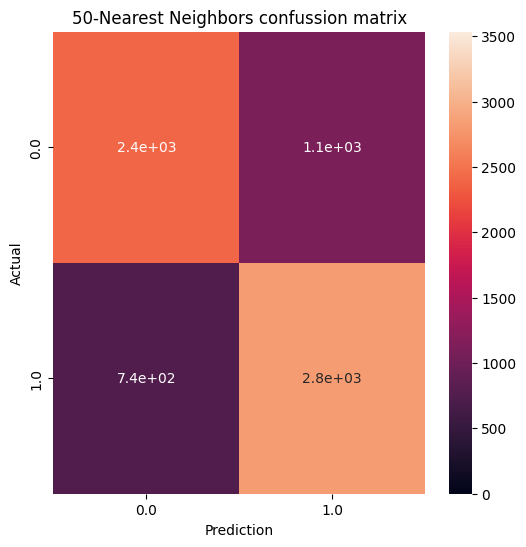

50-Nearest Neighbors classification report:
               precision    recall  f1-score   support

         0.0       0.76      0.68      0.72      3504
         1.0       0.72      0.79      0.75      3566

    accuracy                           0.74      7070
   macro avg       0.74      0.74      0.74      7070
weighted avg       0.74      0.74      0.74      7070



In [ ]:
confussion_matrix = pd.crosstab(y_test, y_pred_KNN, rownames=['Actual'], colnames=['Prediction'])
plt.figure(figsize=(6,6))
sns.heatmap(confussion_matrix, annot=True, vmin=0, vmax=int(len(y_test)/2))
plt.title('35-Nearest Neighbors confussion matrix')
plt.show()

report = classification_report(y_test, y_pred_KNN)
print('35-Nearest Neighbors classification report:\n', report)